### 단순 선형회귀

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### 아버지와 아들의 키 - Galton

In [23]:
df = pd.read_csv('http://www.randomservices.org/random/data/Galton.txt', sep='\t')
df.head()

,Family,Father,Mother,Gender,Height,Kids
0,1,78.5,67.0,M,73.2,4
1,1,78.5,67.0,F,69.2,4
2,1,78.5,67.0,F,69.0,4
3,1,78.5,67.0,F,69.0,4
4,2,75.5,66.5,M,73.5,4


- 아버지와 아들의 키만 발췌
- 컬럼명을 Father, Son으로 변경
- 단위 변경 (inch -> centi)

- Family: The family that the child belongs to, labeled from 1 to 205.
- Father: The father's height, in inches
- Mother: The mother's height, in inches
- Gender: The gender of the child, male (M) or female (F)
- Height: The height of the child, in inches
- Kids: The number of kids in the family of the child

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Family  898 non-null    object 
 1   Father  898 non-null    float64
 2   Mother  898 non-null    float64
 3   Gender  898 non-null    object 
 4   Height  898 non-null    float64
 5   Kids    898 non-null    int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 42.2+ KB


In [24]:
# Filtering: 아들의 키

df = df[df.Gender == 'M'][['Father', 'Height']]
df.columns=['Father', 'Son']
df = df * 2.54
df.head(3)

,Father,Son
0,199.39,185.928
4,191.77,186.690
5,191.77,184.150


- 산점도 그리기

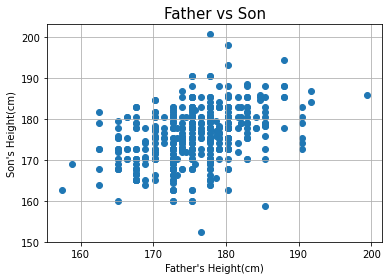

In [29]:
plt.scatter(df.Father, df.Son)
plt.grid()
plt.xlabel("Father's Height(cm)")
plt.ylabel("Son's Height(cm)")
plt.title('Father vs Son', fontsize=15)
plt.show()

- 회귀선 구하고 그리기
    - np.linalg.lstsq()
    - np.polyfit()

In [37]:
weight, bias = np.polyfit(df.Father, df.Son, 1) # X, Y 차수
weight, bias

(0.447747917603028, 97.17763700739309)

In [40]:
xs = np.array([156,201])
ys = weight * xs + bias
ys

array([167.02631215, 187.17496845])

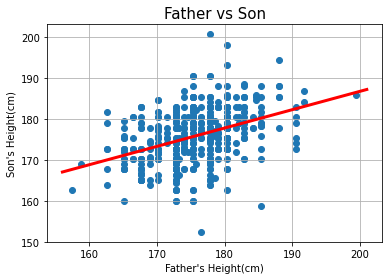

In [41]:
plt.scatter(df.Father, df.Son)
plt.plot(xs, ys, 'r-', lw=3)
plt.grid()
plt.xlabel("Father's Height(cm)")
plt.ylabel("Son's Height(cm)")
plt.title('Father vs Son', fontsize=15)
plt.show()

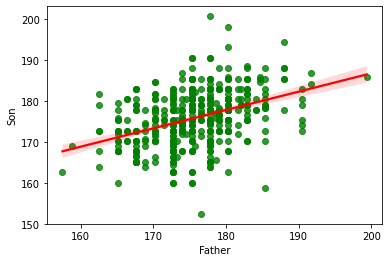

In [46]:
import seaborn as sns

sns.regplot('Father', 'Son', color='green', line_kws={'color':'red'}, data=df)
plt.show()

- Scikit-learn으로 회귀식 구하기

In [47]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [54]:
# X = df.Father.values.reshape(-1,1)
# Y = df.Son.values
# lr.fit(X, Y)

lr.fit(df[['Father']], df.Son)

LinearRegression()

In [56]:
# 기울기, 절편
lr.coef_, lr.intercept_

(array([0.44774792]), 97.17763700739341)

In [57]:
# 잔차 제곱의 합(RSS: Residual Sum of Square)
lr._residues

17556.59951549399

In [58]:
# 평가 - R squared value
lr.score(df.Father.values.reshape(-1,1), df.Son.values)

0.15312927478307048

In [60]:
from sklearn.metrics import r2_score
pred = lr.predict(df.Father.values.reshape(-1,1))
r2_score(df.Son.values, pred)

0.15312927478307048